# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [112]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

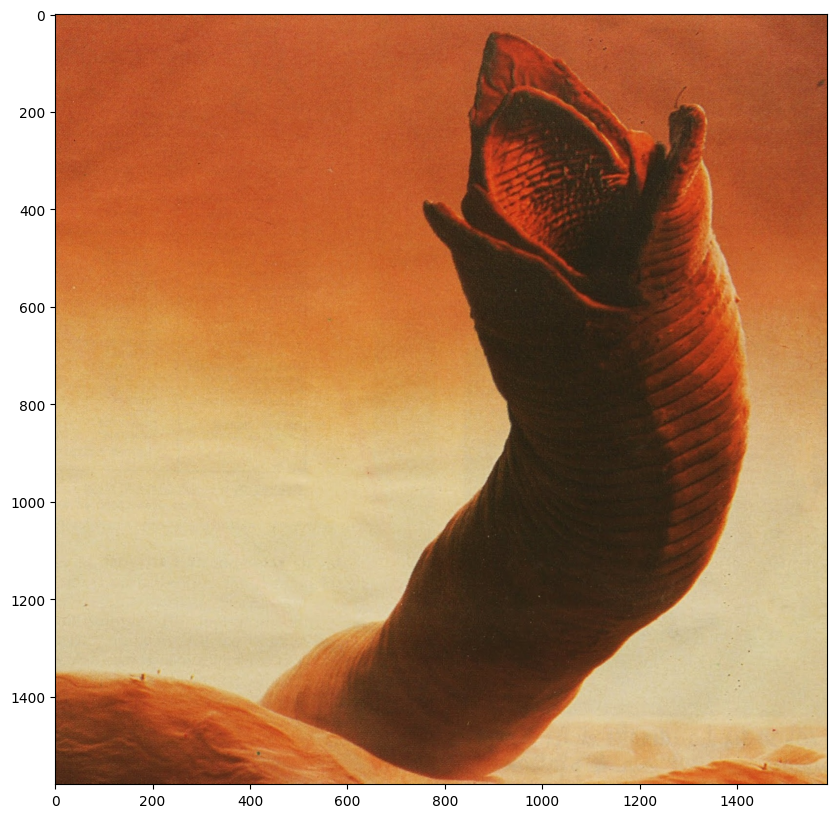

In [113]:
img = cv2.imread('sandwormcropped.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [114]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=10)
plt.imshow(unsharp)

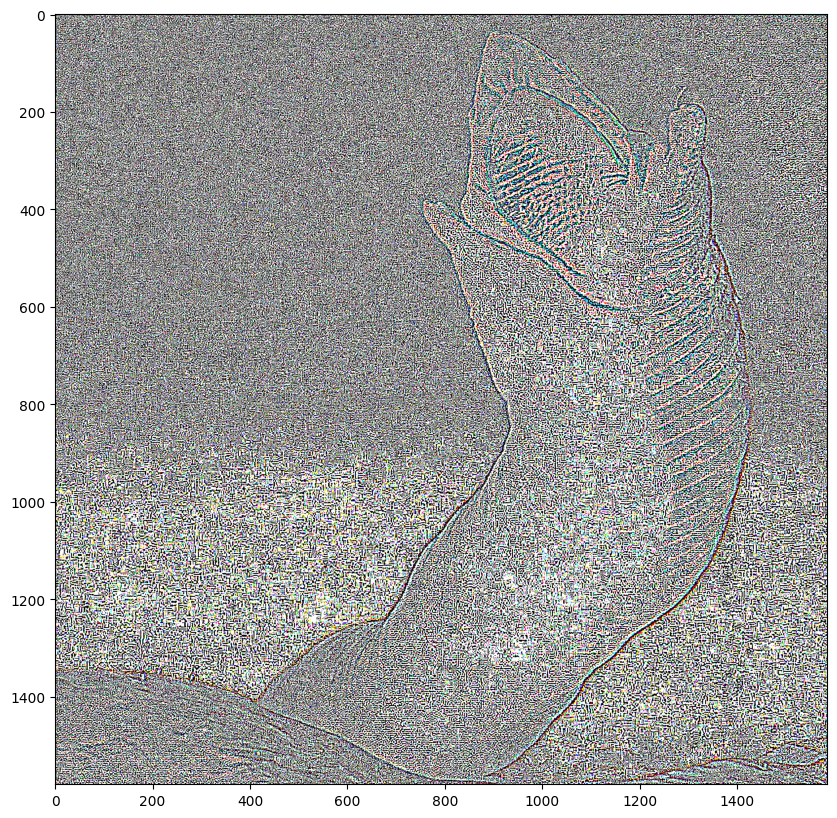

In [115]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img / 255 - unsharp / 255

# deal with overflow and underflow
diff[diff < 0] = 0
diff[diff > 1] = 1

# # redraw black pixels in white in order to visualize it
diff_visualized = diff.copy()
diff_visualized[diff_visualized == 0] = 1
plt.imshow(diff_visualized)

In [116]:
# There is too much noise in diff image, so let's apply threshhold and use the output as alternative option
diff_threshold = diff.copy()
diff_threshold[diff_threshold > 0.6] = 0

# reverse pixels in order to visualize it (turn black in white)
diff_threshold_visual = 1 - diff_threshold
plt.imshow(diff_threshold_visual) # it's almost white, but the borders are merely visible

In [117]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 1.5
sharpened = img / 255 + diff * amount

# deal with overflow and underflow
sharpened[sharpened < 0] = 0
sharpened[sharpened > 1] = 1

sharpened_threshold = img / 255 + diff_threshold * amount
sharpened_threshold[sharpened_threshold < 0] = 0
sharpened_threshold[sharpened_threshold > 1] = 1

plt.subplot(131), plt.title("Original"), plt.imshow(img)
plt.subplot(132), plt.title("USM without threshold"), plt.imshow(sharpened)
plt.subplot(133), plt.title("USM with threshold"), plt.imshow(sharpened_threshold)

(<Axes: title={'center': 'USM with threshold'}>,
 Text(0.5, 1.0, 'USM with threshold'),
 <matplotlib.image.AxesImage at 0x7dc99fe126f0>)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
  
    Answer: from 0.5 to 2
 * What happens if it is too small?

    Answer: no much visual difference
 * What happens if it is too large?

    Answer: then image became brighter, which is not an aim of sharpening